In [249]:
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\python_works'

In [250]:
os.chdir('C:\\Users\\USER\\Documents\\python_works')

In [452]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [252]:
df = pd.read_csv('Student_recruitment.csv')

In [253]:
df = df.set_index('sl_no')
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [255]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [256]:
df[df.status == 'Not Placed']

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN


In [257]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [258]:
df.drop('salary', axis = 1, inplace = True)

In [259]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed


In [260]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 23.5+ KB


# Dividing the Dataset into Numerical and Categorical columns

In [261]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [262]:
df[cat_col].info()
df[cat_col].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          215 non-null    object
 1   ssc_b           215 non-null    object
 2   hsc_b           215 non-null    object
 3   hsc_s           215 non-null    object
 4   degree_t        215 non-null    object
 5   workex          215 non-null    object
 6   specialisation  215 non-null    object
 7   status          215 non-null    object
dtypes: object(8)
memory usage: 15.1+ KB


,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [263]:
for i in cat_col:
    a = (df[i].unique())
    print(a)


['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [264]:
df.gender.unique()

array(['M', 'F'], dtype=object)

In [265]:
cat_col

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [266]:
lb = pre.LabelEncoder()
df['status'] = lb.fit_transform(df['status'])

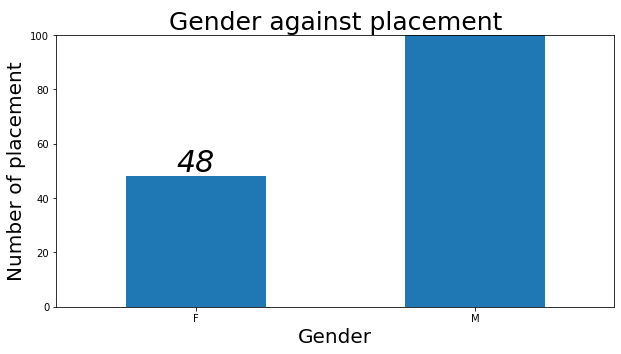

In [267]:
# ploting descriptive charts
plt.figure(figsize=(10,5))
ab = df.groupby('gender')['status'].sum()
ac = df.groupby('gender')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 30, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.)
plt.show()

In [268]:
ab

gender
F     48
M    100
Name: status, dtype: int32

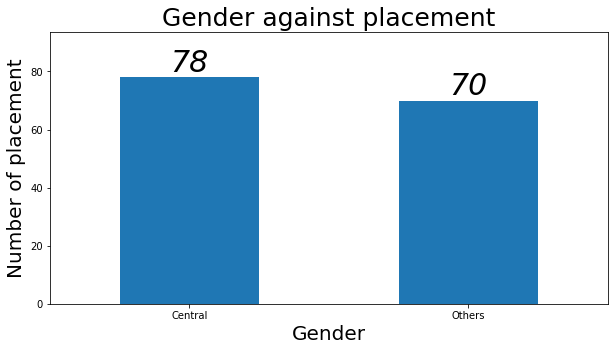

In [269]:
plt.figure(figsize=(10,5))
ab = df.groupby('ssc_b')['status'].sum()
ac = df.groupby('ssc_b')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 30, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

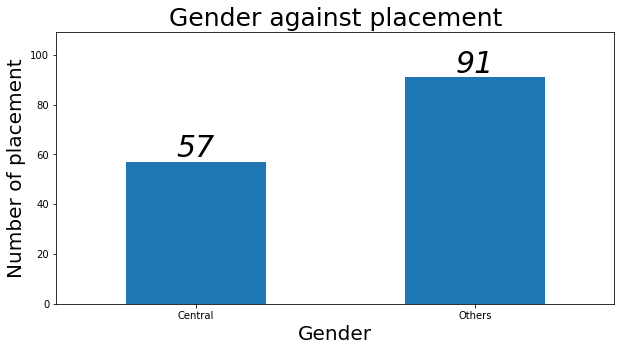

In [270]:
plt.figure(figsize=(10,5))
ab = df.groupby('hsc_b')['status'].sum()
ac = df.groupby('hsc_b')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 30, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

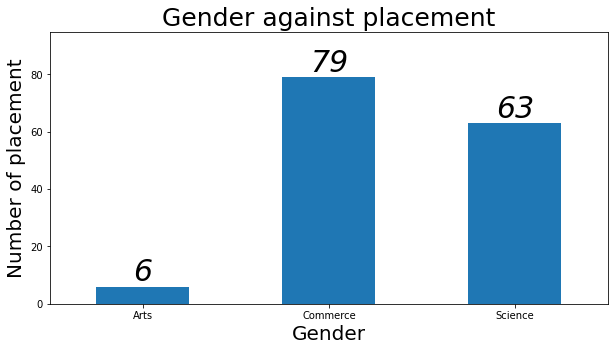

In [271]:
plt.figure(figsize=(10,5))
ab = df.groupby('hsc_s')['status'].sum()
ac = df.groupby('hsc_s')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 30, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

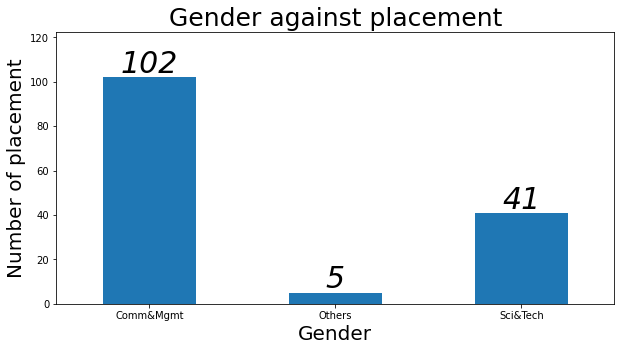

In [272]:
plt.figure(figsize=(10,5))
ab = df.groupby('degree_t')['status'].sum()
ac = df.groupby('degree_t')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 30, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

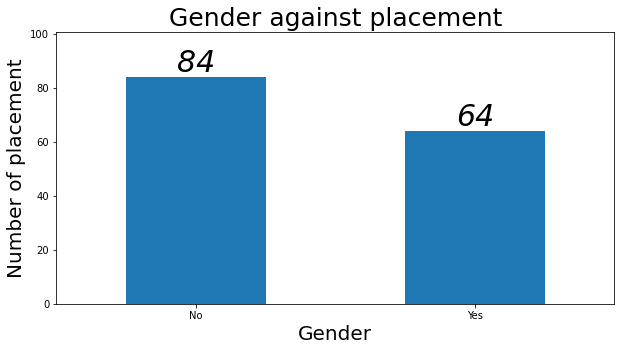

In [273]:
plt.figure(figsize=(10,5))
ab = df.groupby('workex')['status'].sum()
ac = df.groupby('workex')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 30, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

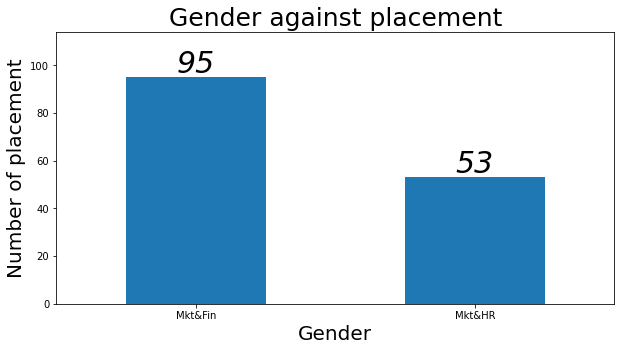

In [274]:
plt.figure(figsize=(10,5))
ab = df.groupby('specialisation')['status'].sum()
ac = df.groupby('specialisation')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 30, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

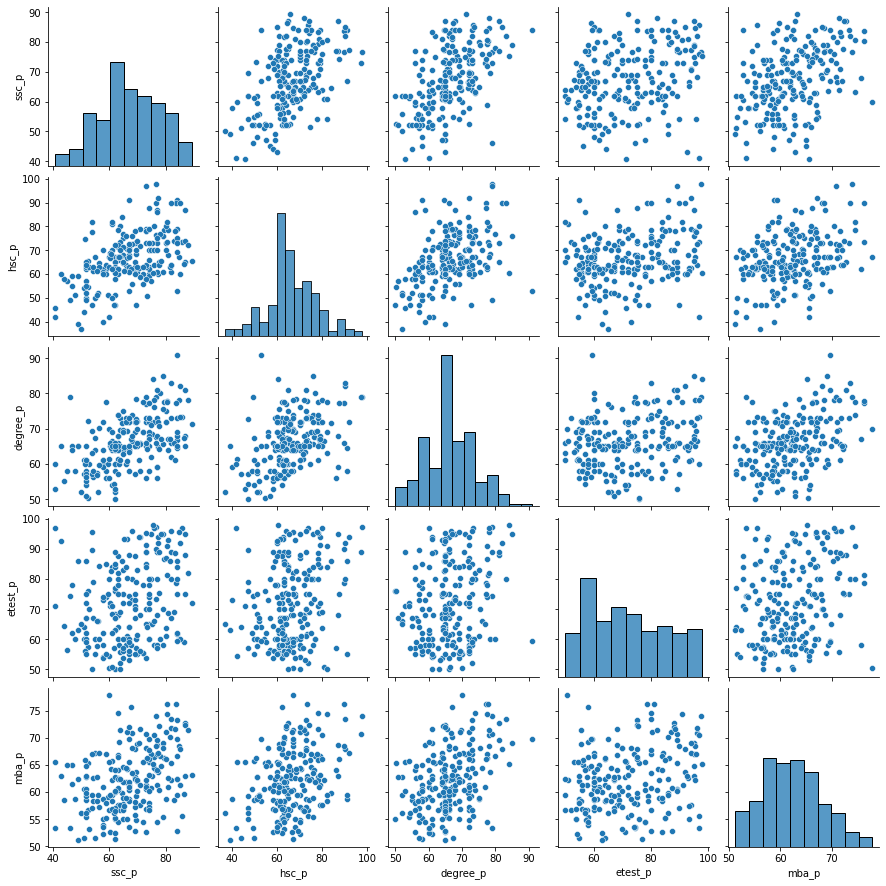

In [275]:
# descriptive statistics for numerical columns
sns.pairplot(df[num_col])

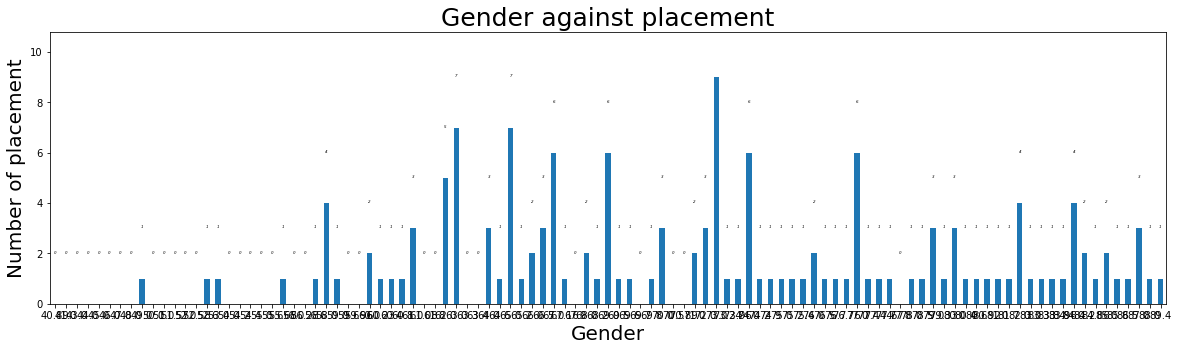

In [276]:
plt.figure(figsize=(20,5))
ab = df.groupby('ssc_p')['status'].sum()
ac = df.groupby('ssc_p')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 4, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

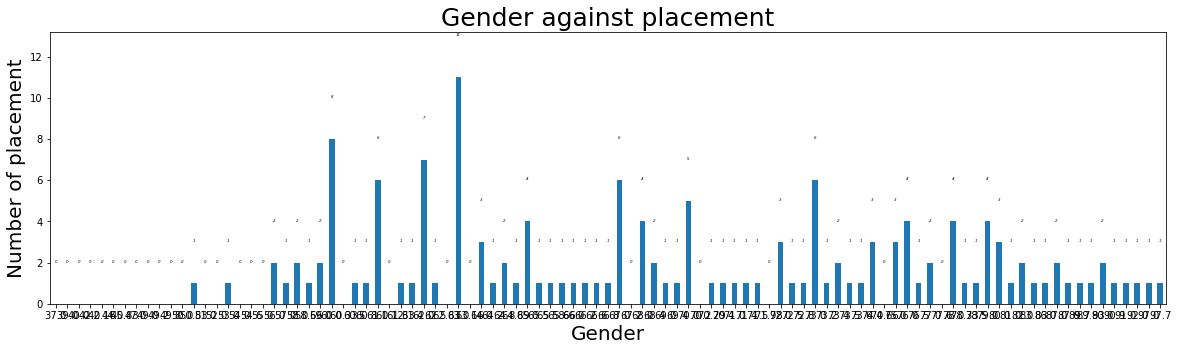

In [277]:
plt.figure(figsize=(20,5))
ab = df.groupby('hsc_p')['status'].sum()
ac = df.groupby('hsc_p')['status'].sum().plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
plt.xlabel('Gender', size = 20)
plt.ylabel('Number of placement', size = 20)
plt.title('Gender against placement', size = 25)


for i,v in enumerate(ab):
    ac.annotate(str(v), xy = (i,v+2), ha = 'center', fontsize = 4, fontstyle = 'italic')

plt.ylim(0,ab.max()*1.2)
plt.show()

In [278]:
num_col

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [279]:
for i in cat_col:
    print(df[i].value_counts())

M    139
F     76
Name: gender, dtype: int64
Central    116
Others      99
Name: ssc_b, dtype: int64
Others     131
Central     84
Name: hsc_b, dtype: int64
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
No     141
Yes     74
Name: workex, dtype: int64
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
1    148
0     67
Name: status, dtype: int64


In [280]:
cat_col

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [281]:
a = ['gender', 'ssc_b', 'hsc_b', 'workex','specialisation']
for i in a:
    df[i] = lb.fit_transform(df[i])

In [282]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
sl_no,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1
2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1
3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1
4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0
5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,Commerce,77.60,Comm&Mgmt,0,91.0,0,74.49,1
212,1,58.00,1,60.00,1,Science,72.00,Sci&Tech,0,74.0,0,53.62,1
213,1,67.00,1,67.00,1,Commerce,73.00,Comm&Mgmt,1,59.0,0,69.72,1


In [283]:
df_new = pd.get_dummies(df)

In [284]:
df_new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0


In [285]:
df_new['status1'] = df_new.status
df_new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status1
sl_no,,,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0,1
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1,0
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,1,0,1,0,0,1
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,1,0,0,1,0,0,1,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0,1,0,1,0,0,1


In [286]:
df_new.drop('status', axis = 1, inplace = True)

In [287]:
df_new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status1
sl_no,,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0,1
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1,0
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0,1
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0,1


In [288]:
df_new.rename(columns = {'status1': 'status'}, inplace = True)


In [289]:
df_new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status
sl_no,,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0,1
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1,0
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0,1
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0,1


<AxesSubplot:>

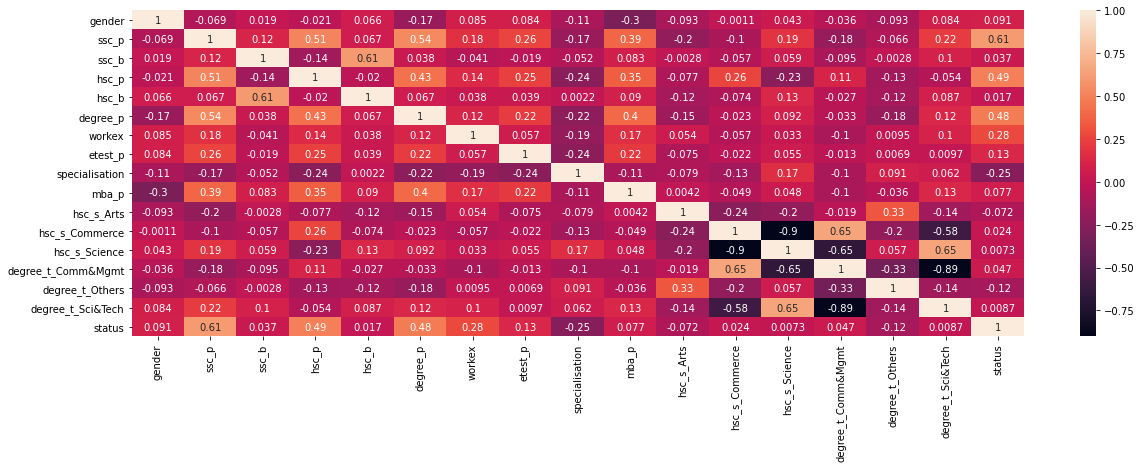

In [290]:
plt.figure(figsize = (20,6))
sns.heatmap(df_new.corr(), annot = True)

In [291]:
#hsc p, hsc b, degree p

In [292]:
num_col

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [293]:
df_new.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'status'],
      dtype='object')

In [294]:
x = df_new.drop('status', axis = 1)

In [295]:
y = df_new.pop('status')
y

sl_no
1      1
2      1
3      1
4      0
5      1
      ..
211    1
212    1
213    1
214    1
215    0
Name: status, Length: 215, dtype: int32

In [296]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 42,   stratify = y)

In [297]:
mutual_info = mutual_info_classif(x,y)

In [298]:
mutual_info

array([0.        , 0.2443574 , 0.        , 0.15955387, 0.        ,
       0.14464017, 0.        , 0.        , 0.        , 0.03066486,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [299]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_new.columns

In [300]:
mutual_info.sort_values(ascending = False)

ssc_p                 0.244357
hsc_p                 0.159554
degree_p              0.144640
mba_p                 0.030665
gender                0.000000
ssc_b                 0.000000
hsc_b                 0.000000
workex                0.000000
etest_p               0.000000
specialisation        0.000000
hsc_s_Arts            0.000000
hsc_s_Commerce        0.000000
hsc_s_Science         0.000000
degree_t_Comm&Mgmt    0.000000
degree_t_Others       0.000000
degree_t_Sci&Tech     0.000000
dtype: float64

In [301]:
model = LogisticRegression()
model.fit(X_train.drop(['degree_t_Comm&Mgmt','hsc_s_Arts'], axis = 1), y_train)

LogisticRegression()

In [302]:
y_pred = model.predict(X_test.drop(['degree_t_Comm&Mgmt','hsc_s_Arts'], axis = 1))

In [303]:
confusion_matrix(y_test, y_pred)

array([[10,  3],
       [ 3, 27]], dtype=int64)

In [304]:
accuracy_score(y_test, y_pred)

0.8604651162790697

In [305]:
scaler = pre.StandardScaler()

In [306]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0


In [307]:
X_train = X_train.drop(['degree_t_Comm&Mgmt','hsc_s_Arts'], axis = 1)

In [308]:
X_train = scaler.fit_transform(X_train)

In [309]:
X_test = X_test.drop(['degree_t_Comm&Mgmt','hsc_s_Arts'], axis = 1)

In [310]:
X_test = scaler.fit_transform(X_test)

In [311]:
model = LogisticRegression()

In [312]:
model.fit(X_train, y_train)

LogisticRegression()

In [313]:
y_pred2 = model.predict(X_test)

In [314]:
confusion_matrix(y_test, y_pred2)

array([[11,  2],
       [ 4, 26]], dtype=int64)

In [315]:
accuracy_score(y_test, y_pred2)

0.8604651162790697

In [316]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.93      0.87      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.86      0.84        43
weighted avg       0.87      0.86      0.86        43



In [319]:
df_new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0


In [323]:
df_new.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'degree_p', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech'],
      dtype='object')

In [324]:
df_new1 = df_new.drop(['hsc_p', 'hsc_b', 'degree_p', 'hsc_s_Arts', 'degree_t_Comm&Mgmt'], axis = 1)

In [325]:
df_new1

,gender,ssc_p,ssc_b,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,
1,1,67.00,1,0,55.0,1,58.80,1,0,0,1
2,1,79.33,0,1,86.5,0,66.28,0,1,0,1
3,1,65.00,0,0,75.0,0,57.80,0,0,0,0
4,1,56.00,0,0,66.0,1,59.43,0,1,0,1
5,1,85.80,0,0,96.8,0,55.50,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,0,91.0,0,74.49,1,0,0,0
212,1,58.00,1,0,74.0,0,53.62,0,1,0,1
213,1,67.00,1,1,59.0,0,69.72,1,0,0,0


In [326]:
x = df_new1

In [327]:
y

sl_no
1      1
2      1
3      1
4      0
5      1
      ..
211    1
212    1
213    1
214    1
215    0
Name: status, Length: 215, dtype: int32

In [328]:
mutual_info = mutual_info_classif(x,y)

In [331]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_new1.columns
mutual_info.sort_values(ascending = False)

ssc_p                0.239471
hsc_s_Commerce       0.054812
workex               0.048268
specialisation       0.038871
mba_p                0.030000
degree_t_Sci&Tech    0.029762
gender               0.000000
ssc_b                0.000000
etest_p              0.000000
hsc_s_Science        0.000000
degree_t_Others      0.000000
dtype: float64

<AxesSubplot:>

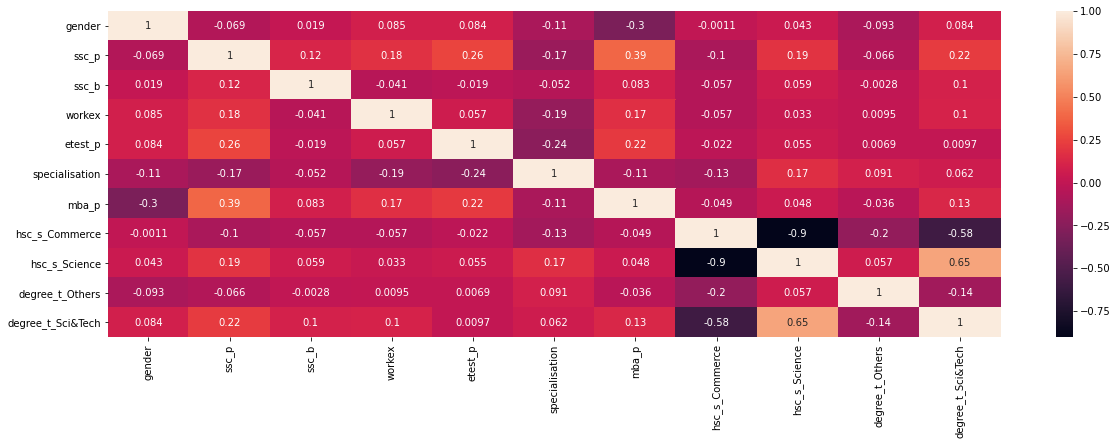

In [333]:
plt.figure(figsize = (20, 6))
sns.heatmap(x.corr(), annot = True)

In [334]:
x

,gender,ssc_p,ssc_b,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,
1,1,67.00,1,0,55.0,1,58.80,1,0,0,1
2,1,79.33,0,1,86.5,0,66.28,0,1,0,1
3,1,65.00,0,0,75.0,0,57.80,0,0,0,0
4,1,56.00,0,0,66.0,1,59.43,0,1,0,1
5,1,85.80,0,0,96.8,0,55.50,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,0,91.0,0,74.49,1,0,0,0
212,1,58.00,1,0,74.0,0,53.62,0,1,0,1
213,1,67.00,1,1,59.0,0,69.72,1,0,0,0


In [335]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 42, stratify = y)

In [336]:
X_train

,gender,ssc_p,ssc_b,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,
148,1,70.00,0,0,83.00,0,62.28,1,0,0,0
162,1,55.60,1,0,57.63,1,62.72,1,0,0,0
170,1,59.96,1,0,54.48,1,65.48,0,1,0,1
132,0,74.90,1,1,80.00,0,60.78,0,1,1,0
28,1,63.00,1,0,68.00,1,57.69,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
91,0,85.00,1,0,92.00,0,68.03,1,0,0,0
85,1,70.00,0,1,55.00,0,62.00,0,1,0,1
167,1,62.00,1,1,63.00,1,52.38,1,0,0,0


In [337]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [340]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [342]:
y_predict = lreg.predict(X_test)

In [343]:
confusion_matrix(y_test, y_predict)

array([[ 9,  4],
       [ 6, 24]], dtype=int64)

In [344]:
accuracy_score(y_test,y_predict)

0.7674418604651163

In [346]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.86      0.80      0.83        30

    accuracy                           0.77        43
   macro avg       0.73      0.75      0.74        43
weighted avg       0.78      0.77      0.77        43



In [348]:
df_new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0


In [349]:
x = df_new

In [359]:
mutual_info = mutual_info_classif(x,y)


In [360]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = df_new.columns
mutual_info.sort_values(ascending = False)

ssc_p                 0.235476
hsc_p                 0.181769
degree_p              0.135568
workex                0.078534
specialisation        0.071480
ssc_b                 0.030981
mba_p                 0.030923
hsc_s_Science         0.025344
degree_t_Others       0.003188
hsc_s_Arts            0.003011
gender                0.000000
hsc_b                 0.000000
etest_p               0.000000
hsc_s_Commerce        0.000000
degree_t_Comm&Mgmt    0.000000
degree_t_Sci&Tech     0.000000
dtype: float64

In [361]:
sel_col =[]
for i in mutual_info.index:
    if (mutual_info[i] >0):
        sel_col.append(i)
sel_col

['ssc_p',
 'ssc_b',
 'hsc_p',
 'degree_p',
 'workex',
 'specialisation',
 'mba_p',
 'hsc_s_Arts',
 'hsc_s_Science',
 'degree_t_Others']

In [362]:
new_df = df_new[sel_col]

In [363]:
new_df

,ssc_p,ssc_b,hsc_p,degree_p,workex,specialisation,mba_p,hsc_s_Arts,hsc_s_Science,degree_t_Others
sl_no,,,,,,,,,,
1,67.00,1,91.00,58.00,0,1,58.80,0,0,0
2,79.33,0,78.33,77.48,1,0,66.28,0,1,0
3,65.00,0,68.00,64.00,0,0,57.80,1,0,0
4,56.00,0,52.00,52.00,0,1,59.43,0,1,0
5,85.80,0,73.60,73.30,0,0,55.50,0,0,0
...,...,...,...,...,...,...,...,...,...,...
211,80.60,1,82.00,77.60,0,0,74.49,0,0,0
212,58.00,1,60.00,72.00,0,0,53.62,0,1,0
213,67.00,1,67.00,73.00,1,0,69.72,0,0,0


In [364]:
new_df_1 = new_df
top7 = SelectKBest(mutual_info_classif, 7)
top7.fit(new_df_1, y)
top7

SelectKBest(k=7,
            score_func=<function mutual_info_classif at 0x00000170BB56F280>)

In [365]:
top7 = list(new_df_1.columns[top7.get_support()])

In [366]:
top7

['ssc_p', 'ssc_b', 'hsc_p', 'degree_p', 'workex', 'specialisation', 'mba_p']

In [367]:
new_df_1 = new_df_1[top7]

In [368]:
new_df_1

,ssc_p,ssc_b,hsc_p,degree_p,workex,specialisation,mba_p
sl_no,,,,,,,
1,67.00,1,91.00,58.00,0,1,58.80
2,79.33,0,78.33,77.48,1,0,66.28
3,65.00,0,68.00,64.00,0,0,57.80
4,56.00,0,52.00,52.00,0,1,59.43
5,85.80,0,73.60,73.30,0,0,55.50
...,...,...,...,...,...,...,...
211,80.60,1,82.00,77.60,0,0,74.49
212,58.00,1,60.00,72.00,0,0,53.62
213,67.00,1,67.00,73.00,1,0,69.72


In [369]:
x = new_df_1

In [370]:
x

,ssc_p,ssc_b,hsc_p,degree_p,workex,specialisation,mba_p
sl_no,,,,,,,
1,67.00,1,91.00,58.00,0,1,58.80
2,79.33,0,78.33,77.48,1,0,66.28
3,65.00,0,68.00,64.00,0,0,57.80
4,56.00,0,52.00,52.00,0,1,59.43
5,85.80,0,73.60,73.30,0,0,55.50
...,...,...,...,...,...,...,...
211,80.60,1,82.00,77.60,0,0,74.49
212,58.00,1,60.00,72.00,0,0,53.62
213,67.00,1,67.00,73.00,1,0,69.72


In [371]:
y

sl_no
1      1
2      1
3      1
4      0
5      1
      ..
211    1
212    1
213    1
214    1
215    0
Name: status, Length: 215, dtype: int32

In [372]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2, stratify = y)

In [373]:
X_train = scaler.fit_transform(X_train)

In [374]:
X_test = scaler.fit_transform(X_test)

In [375]:
X_train

array([[ 2.60729296e-01, -9.10926580e-01,  6.94120214e-01, ...,
        -7.79407875e-01, -8.89756521e-01,  7.88693086e-04],
       [-1.06575905e+00,  1.09778331e+00, -1.40543063e+00, ...,
        -7.79407875e-01,  1.12390297e+00,  7.44779434e-02],
       [-6.64127854e-01,  1.09778331e+00, -2.21238844e+00, ...,
        -7.79407875e-01,  1.12390297e+00,  5.36710513e-01],
       ...,
       [-4.76208672e-01,  1.09778331e+00, -4.01297619e-01, ...,
         1.28302527e+00,  1.12390297e+00, -1.65721944e+00],
       [ 1.82672248e+00, -9.10926580e-01,  6.94120214e-01, ...,
         1.28302527e+00,  1.12390297e+00,  1.67721914e+00],
       [ 4.44963788e-01,  1.09778331e+00, -3.10012800e-01, ...,
         1.28302527e+00, -8.89756521e-01, -1.30552074e+00]])

In [376]:
X_test

array([[-0.64714137,  1.02353263,  0.37208229, -0.4005648 , -0.51449576,
         1.12390297, -0.53951477],
       [ 0.58305663, -0.97700842,  0.37208229,  0.67780654,  1.94365063,
        -0.88975652, -0.97657749],
       [-0.07935767,  1.02353263,  0.18217679, -0.4005648 ,  1.94365063,
         1.12390297, -1.7017922 ],
       [-0.8364026 , -0.97700842, -0.38753971,  1.41918684, -0.51449576,
         1.12390297,  0.91091464],
       [-0.45788014, -0.97700842,  0.01126184, -0.18489053,  1.94365063,
        -0.88975652,  0.04839262],
       [-0.36324952,  1.02353263,  0.39107284, -0.80495405, -0.51449576,
        -0.88975652,  0.040657  ],
       [-0.12667298,  1.02353263,  0.41006339,  0.6683708 , -0.51449576,
        -0.88975652,  0.38295834],
       [ 0.10990356, -0.97700842,  1.13170429,  0.67780654, -0.51449576,
         1.12390297,  0.08707074],
       [-1.27170343, -0.97700842, -0.47109813, -1.45197685, -0.51449576,
         1.12390297,  0.06966559],
       [ 1.43473217,  1.0235

In [377]:
lreg_1 = LogisticRegression()

In [378]:
lreg_1.fit(X_train, y_train)

LogisticRegression()

In [381]:
ypredd =lreg_1.predict(X_test)

In [383]:
confusion_matrix(y_test, ypredd)

array([[ 9,  4],
       [ 2, 28]], dtype=int64)

In [384]:
accuracy_score(y_test, ypredd)

0.8604651162790697

In [385]:
print(classification_report(y_test, ypredd))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.88      0.93      0.90        30

    accuracy                           0.86        43
   macro avg       0.85      0.81      0.83        43
weighted avg       0.86      0.86      0.86        43



In [386]:
6/7

0.8571428571428571

## KNN Algorithm

In [390]:
from sklearn.neighbors import KNeighborsClassifier

In [393]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')

In [394]:
df_new

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,1,0,0,1
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,0,1,0,1,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,0,1,0,0,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,0,1,0,1,0,0


In [395]:
new_df_1

,ssc_p,ssc_b,hsc_p,degree_p,workex,specialisation,mba_p
sl_no,,,,,,,
1,67.00,1,91.00,58.00,0,1,58.80
2,79.33,0,78.33,77.48,1,0,66.28
3,65.00,0,68.00,64.00,0,0,57.80
4,56.00,0,52.00,52.00,0,1,59.43
5,85.80,0,73.60,73.30,0,0,55.50
...,...,...,...,...,...,...,...
211,80.60,1,82.00,77.60,0,0,74.49
212,58.00,1,60.00,72.00,0,0,53.62
213,67.00,1,67.00,73.00,1,0,69.72


## The new Dataset
**df_new** , d data with all variables  
**new_df**, d data with mutual info greater than 1  
**new_df_1**, d data with 7KBest

In [398]:
X_train, X_test, y_train, y_test = train_test_split(df_new.drop(['hsc_s_Arts',	'degree_t_Comm&Mgmt'], axis =1),
                                                    y, random_state=42, test_size = .2, stratify = y)

In [400]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

array([[ 0.68562779,  0.2607293 , -0.91092658, ..., -0.84852814,
        -0.20597146, -0.59525684],
       [ 0.68562779, -1.06575905,  1.09778331, ..., -0.84852814,
        -0.20597146, -0.59525684],
       [ 0.68562779, -0.66412785,  1.09778331, ...,  1.1785113 ,
        -0.20597146,  1.67994709],
       ...,
       [ 0.68562779, -0.47620867,  1.09778331, ..., -0.84852814,
        -0.20597146, -0.59525684],
       [ 0.68562779,  1.82672248, -0.91092658, ...,  1.1785113 ,
        -0.20597146,  1.67994709],
       [ 0.68562779,  0.44496379,  1.09778331, ...,  1.1785113 ,
        -0.20597146,  1.67994709]])

In [402]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [404]:
ypred = knn.predict(X_test)

In [405]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



In [406]:
accuracy_score(y_test, y_pred)

0.8604651162790697

In [407]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y, random_state=42, test_size = .2, stratify = y)

In [409]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [411]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [413]:
Y_pred = knn.predict(X_test)

In [417]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.81      0.83      0.82        30

    accuracy                           0.74        43
   macro avg       0.69      0.69      0.69        43
weighted avg       0.74      0.74      0.74        43



In [419]:
print(round(accuracy_score(y_test, Y_pred), 2))

0.74


In [421]:
print(confusion_matrix(y_test, Y_pred))

[[ 7  6]
 [ 5 25]]


In [422]:
X_train, X_test, y_train, y_test = train_test_split(new_df_1, y, random_state=42, test_size = .2, stratify = y)

In [423]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [424]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [425]:
Y_Pred = knn.predict(X_test)

In [426]:
print(confusion_matrix(y_test, Y_Pred))

[[ 7  6]
 [ 2 28]]


In [428]:
print(round(accuracy_score(y_test, Y_Pred), 2))

0.81


In [430]:
print(classification_report(y_test, Y_Pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.82      0.93      0.87        30

    accuracy                           0.81        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.81      0.81      0.80        43



In [433]:
from sklearn.model_selection import GridSearchCV
param = dict(n_neighbors = list(range(5,57,2)), algorithm = list(['brute', 'auto']))
print(param)

{'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55], 'algorithm': ['brute', 'auto']}


In [442]:
grid = GridSearchCV(knn, param, cv = 10, scoring ='f1')

In [443]:
x = df_new.drop(['hsc_s_Arts',	'degree_t_Comm&Mgmt'], axis =1)


In [444]:
y

sl_no
1      1
2      1
3      1
4      0
5      1
      ..
211    1
212    1
213    1
214    1
215    0
Name: status, Length: 215, dtype: int32

In [445]:
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,0,1
2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,1,0,1
3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,0,0,0,0
4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,1,0,1
5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,80.60,1,82.00,1,77.60,0,91.0,0,74.49,1,0,0,0
212,1,58.00,1,60.00,1,72.00,0,74.0,0,53.62,0,1,0,1
213,1,67.00,1,67.00,1,73.00,1,59.0,0,69.72,1,0,0,0


In [446]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'algorithm': ['brute', 'auto'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55]},
             scoring='f1')

In [448]:
print(grid.best_score_)

0.905250201253522


In [449]:
print(grid.best_params_)

{'algorithm': 'brute', 'n_neighbors': 9}


In [450]:
print(grid.best_estimator_)

KNeighborsClassifier(algorithm='brute', n_neighbors=9)


# function to calculate average accuracy for my three datasets

In [470]:
def average_accuracy(df, response, model):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
    all_accuracy = []
        
    x = df
    y= response
    
    for train_index, test_index in skf.split(x,y):
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        all_accuracy.append(model.score(X_test, y_test))
        print([round(model.score(X_test, y_test),2)])      
    all_accuracy = sum(all_accuracy)/len(all_accuracy)
    return all_accuracy
knn = KNeighborsClassifier(n_neighbors = 9, algorithm ='brute')
print(average_accuracy(df_new,y,knn))
print(average_accuracy(new_df,y,knn))
print(average_accuracy(new_df_1,y,knn))   

[0.86]
[0.82]
[0.86]
[0.86]
[0.86]
[0.76]
[0.86]
[0.76]
[0.86]
[0.86]
0.8367965367965366
[0.91]
[0.82]
[0.91]
[0.86]
[0.82]
[0.9]
[0.86]
[0.76]
[0.9]
[0.76]
0.850865800865801
[0.91]
[0.82]
[0.91]
[0.86]
[0.82]
[0.9]
[0.86]
[0.76]
[0.9]
[0.76]
0.850865800865801
